In [1]:
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt
if not os.path.exists('pics/'):
    os.makedirs('pics/')

### A City's Weather's Proportion in A Whole Year 

In [2]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}/weather/y{}_pie.jpg'.format(city,year)
if not os.path.exists('pics/{}/weather/'.format(city)):
    os.makedirs('pics/{}/weather/'.format(city))
# Code
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city, year_start, year_end, info_type='weather')
keys = weather_info.index.tolist()
values = weather_info.days.tolist()

The weather information of San Diego during 20180101-20181231 :
Total days: 365
              days  percentage
icon                          
partlysunny    102    0.279452
partlycloudy    96    0.263014
mostlysunny     53    0.145205
rain            39    0.106849
mostlycloudy    29    0.079452
hazy            18    0.049315
clear           15    0.041096
cloudy          11    0.030137
tstorms          2    0.005479


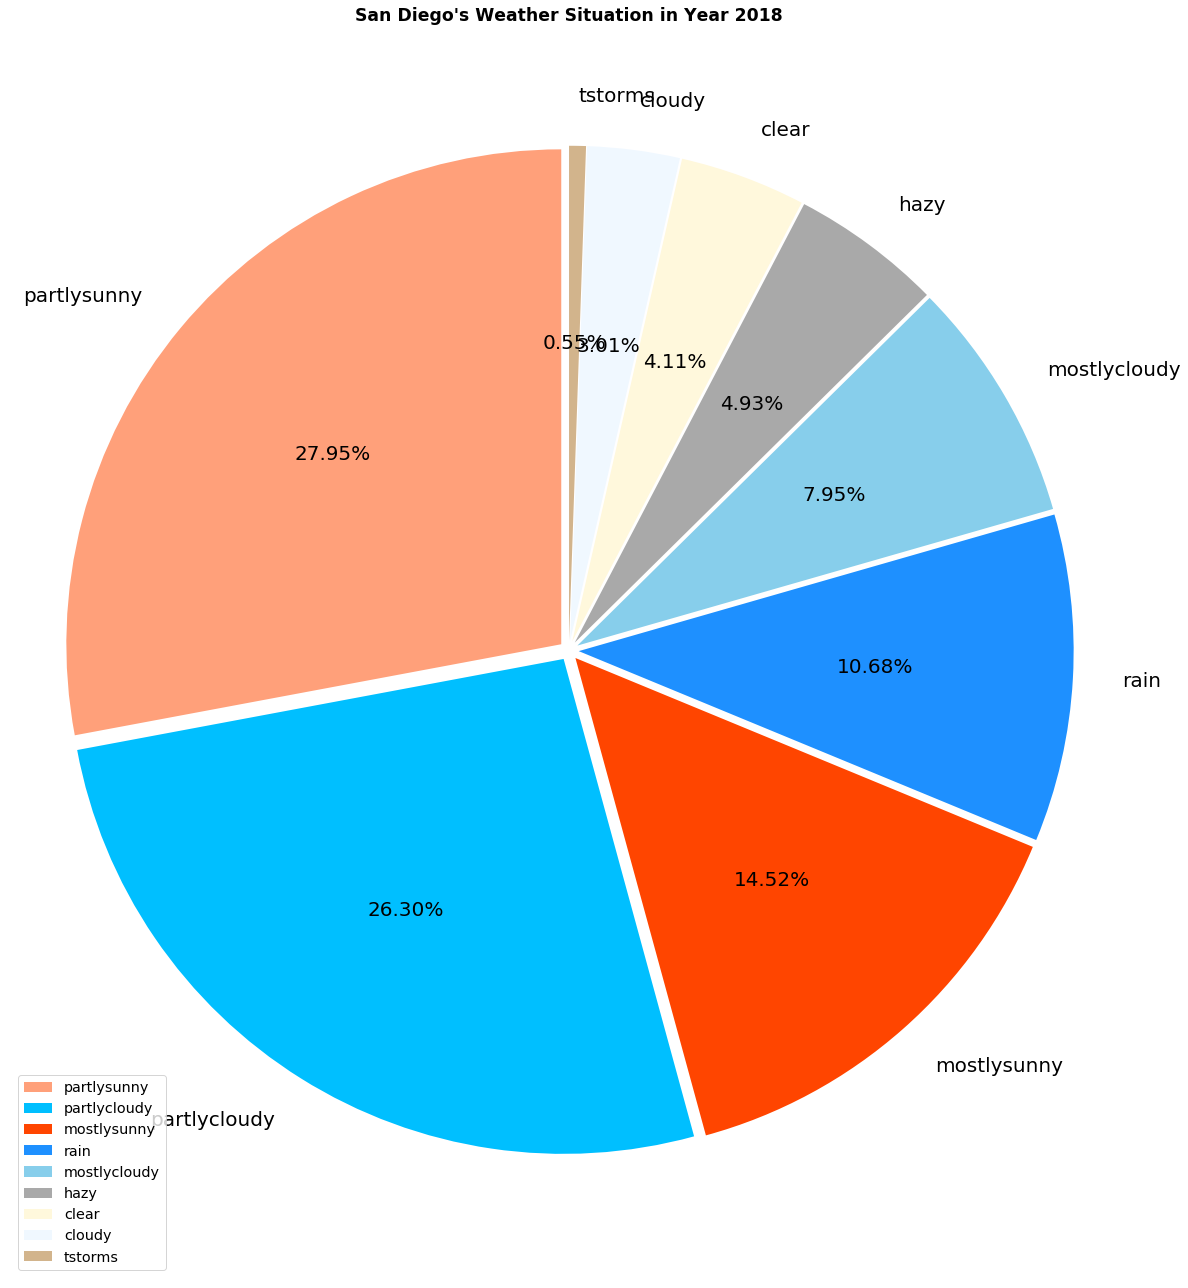

In [3]:
# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.show()

### A City's Monthly Weather Plot of a Whole Year

In [4]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}_icon_y{}_plot.jpg'.format(city,year)
# Code
icon_days_dict = dict([(key,[]) for key in weather_color_refer.keys()])
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='weather', output=False)
    for key in weather_color_refer.keys():
            try:
                icon_days_dict[key].append(weather_info['days'][key])
            except :
                icon_days_dict[key].append(0)
print(icon_days_dict)

{'mostlysunny': [6, 5, 2, 6, 2, 3, 3, 5, 4, 3, 7, 7], 'partlysunny': [6, 2, 9, 9, 11, 9, 13, 9, 10, 13, 8, 3], 'cloudy': [0, 0, 0, 2, 4, 3, 0, 0, 2, 0, 0, 0], 'mostlycloudy': [2, 1, 2, 4, 4, 6, 4, 1, 3, 1, 0, 1], 'partlycloudy': [6, 9, 6, 6, 3, 8, 11, 15, 10, 4, 9, 9], 'rain': [4, 5, 10, 2, 7, 0, 0, 1, 1, 1, 3, 5], 'clear': [2, 2, 1, 1, 0, 1, 0, 0, 0, 5, 2, 1], 'hazy': [5, 4, 1, 0, 0, 0, 0, 0, 0, 3, 1, 4], 'tstorms': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]}


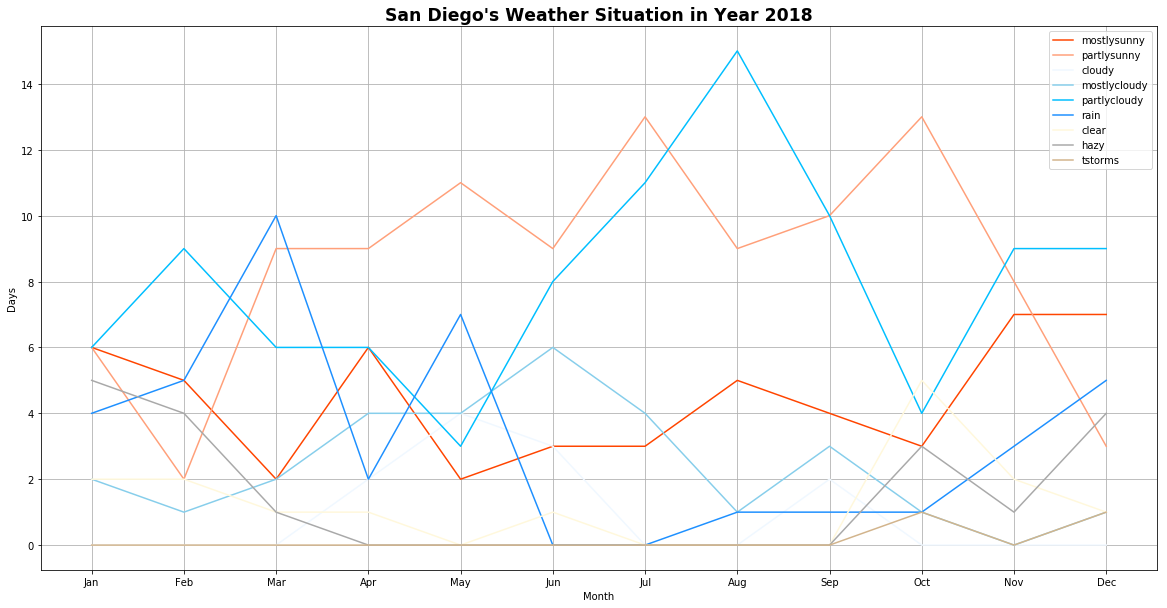

In [5]:
# Plot
plt.figure(figsize=(20,10))
for key in weather_color_refer.keys():
    plt.plot(range(12), icon_days_dict[key], color=weather_color_refer[key])
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Days')
plt.legend(list([key for key in weather_color_refer.keys()]))
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.show()

### A City's Weather Situation of a Specific Month

In [6]:
# Parameter
city = 'KSAN'
year = 2019
month = 3
fname = 'pics/{}/weather/y{}_m{}_pie.jpg'.format(city,year,month)

if not os.path.exists('pics/{}/weather/'.format(city)):
    os.makedirs('pics/{}/weather/'.format(city))
# Code
month_start, month_end = get_monthly_start_end(year=year, month=month)
weather_info = get_info(city,month_start, month_end, info_type='weather')
keys = weather_info.index.tolist()
values = weather_info.days.tolist()

The weather information of San Diego during 20190301-20190331 :
Total days: 31
              days  percentage
icon                          
rain            10    0.322581
partlysunny      9    0.290323
partlycloudy     4    0.129032
clear            3    0.096774
mostlysunny      3    0.096774
mostlycloudy     1    0.032258
tstorms          1    0.032258


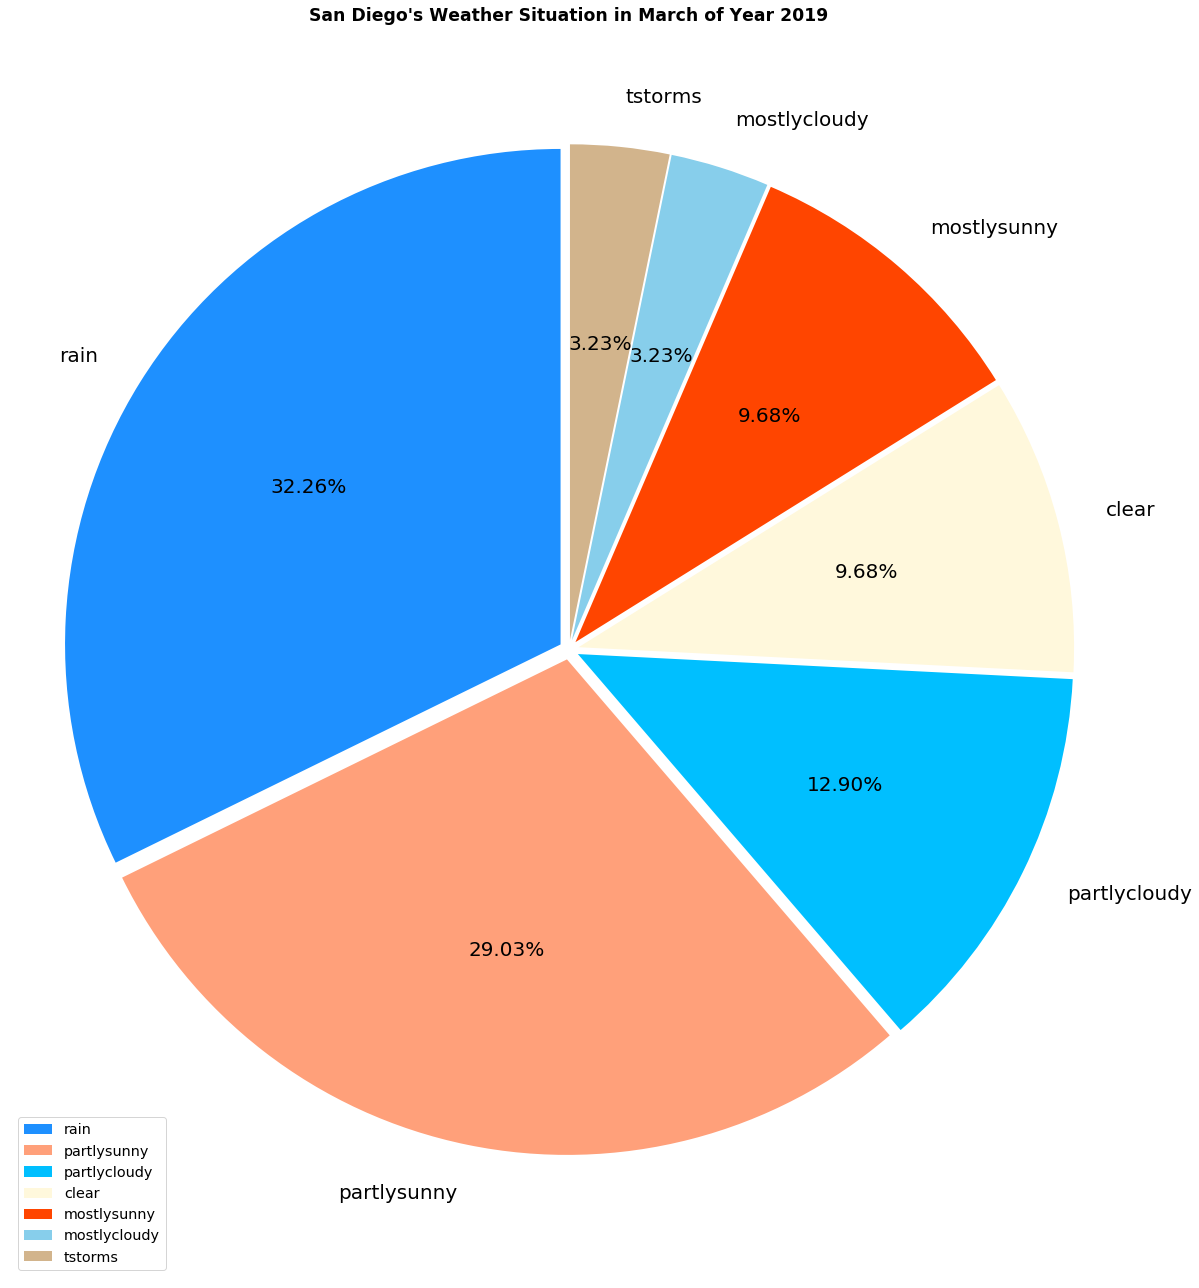

In [7]:
# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
#plt.savefig(fname)
title_str = '{}\'s Weather Situation in {} of Year {}'.format(code_city_refer[city], get_month_str(month), year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
#plt.savefig(fname)
plt.show()